
# Spiral Dataset Generation

This notebook generates a 3-class spiral dataset, visualizes it, and stores it in NPZ format.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(83)

# Dataset parameters
N = 100   # points per class
D = 2     # dimensionality
K = 3     # number of classes

X = np.zeros((N*K, D))
y = np.zeros(N*K, dtype=np.int64)

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.4
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (300, 2)
y shape: (300,)


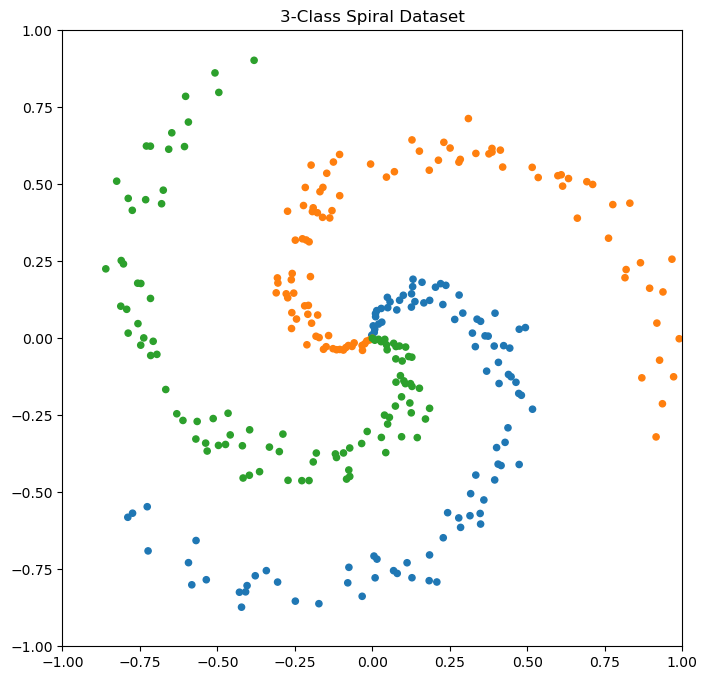

In [37]:

# Visualization
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"]))
plt.title("3-Class Spiral Dataset")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()


In [38]:

# One-hot encoding
y_onehot = np.zeros((N*K, K))
for i in range(len(y)):
    y_onehot[i, y[i]] = 1.0

print("One-hot label shape:", y_onehot.shape)


One-hot label shape: (300, 3)


In [39]:

# Train / test split (70 / 30)
indices = np.random.permutation(len(X))
split = int(0.7 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train, y_train = X[train_idx], y_onehot[train_idx]
X_test, y_test = X[test_idx], y_onehot[test_idx]

np.savez(
    "spiral_dataset.npz",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

print("Saved spiral_dataset.npz")


Saved spiral_dataset.npz


In [42]:
y_test[:,2].sum(

)

32.0